In [ ]:
# Import Library
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Download dan extract data

os.environ['KAGGLE_USERNAME'] = "rezaanandiraka"
os.environ['KAGGLE_KEY'] = "e8a2fccf3641a79c28bb7005aa4ef9b0"
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
with zipfile.ZipFile('chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall()

100% 2.29G/2.29G [00:23<00:00, 99.8MB/s]
100% 2.29G/2.29G [00:23<00:00, 104MB/s] 


In [ ]:
# Assign directorry

base_dir = '/content/chest_xray'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'val')

# direktori normal pada direktori data training
train_normal_dir = "/content/chest_xray/train/NORMAL/"
# direktori pneumoni pada direktori data training
train_pneumonia_dir = "/content/chest_xray/train/PNEUMONIA/"

# direktori normal pada direktori data testing
test_normal_dir = "/content/chest_xray/test/NORMAL/"
# direktori pneumoni pada direktori data testing
test_pneumonia_dir = "/content/chest_xray/test/PNEUMONIA/"

# direktori normal pada direktori data validasi
validation_normal_dir = "/content/chest_xray/val/NORMAL/"
# direktori pneumoni pada direktori data validasi
validation_pneumonia_dir = "/content/chest_xray/val/PNEUMONIA/"



In [ ]:
# Cek jumlah data di setiap directory

print(len(os.listdir(train_normal_dir)))
print(len(os.listdir(train_pneumonia_dir)))
print(len(os.listdir(test_normal_dir)))
print(len(os.listdir(test_pneumonia_dir)))
print(len(os.listdir(validation_normal_dir)))
print(len(os.listdir(validation_pneumonia_dir)))


1341
3875
234
390
8
8


In [ ]:
# Model CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss      = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics   = ['accuracy'])

In [ ]:
#Fitting

train_datagen = ImageDataGenerator(
                    rescale         = 1./255,
                    shear_range     = 0.2,
                    zoom_range      = 0.2,
                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,  
                    target_size   = (64, 64),  
                    batch_size    = 32,
                    class_mode    = 'binary')

validation_generator = test_datagen.flow_from_directory(
                    test_dir, 
                    target_size = (64, 64), 
                    batch_size  = 32, 
                    class_mode  = 'binary')




Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
model_result = model.fit(
                train_generator,
                steps_per_epoch=50,  
                epochs=10,
                validation_data=validation_generator, 
                validation_steps=5)


Epoch 1/10
50/50 [==============================] - 26s 526ms/step - loss: 0.5555 - accuracy: 0.7550 - val_loss: 0.6260 - val_accuracy: 0.6250
Epoch 2/10
50/50 [==============================] - 26s 523ms/step - loss: 0.3280 - accuracy: 0.8606 - val_loss: 0.8139 - val_accuracy: 0.6875
Epoch 3/10
50/50 [==============================] - 26s 514ms/step - loss: 0.2520 - accuracy: 0.8913 - val_loss: 0.3323 - val_accuracy: 0.8375
Epoch 4/10
50/50 [==============================] - 26s 521ms/step - loss: 0.2354 - accuracy: 0.8969 - val_loss: 0.4033 - val_accuracy: 0.8125
Epoch 5/10
50/50 [==============================] - 26s 530ms/step - loss: 0.2838 - accuracy: 0.8769 - val_loss: 0.3365 - val_accuracy: 0.8438
Epoch 6/10
50/50 [==============================] - 27s 542ms/step - loss: 0.2461 - accuracy: 0.8963 - val_loss: 0.2956 - val_accuracy: 0.8625
Epoch 7/10
50/50 [==============================] - 26s 515ms/step - loss: 0.2435 - accuracy: 0.8981 - val_loss: 0.3382 - val_accuracy: 0.8250

Text(0.5, 1.0, 'Training and validation loss')

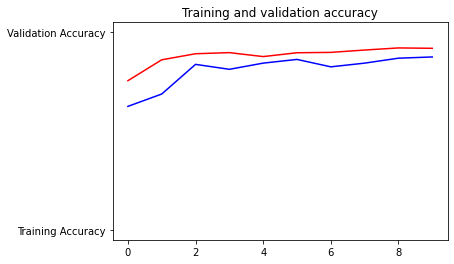

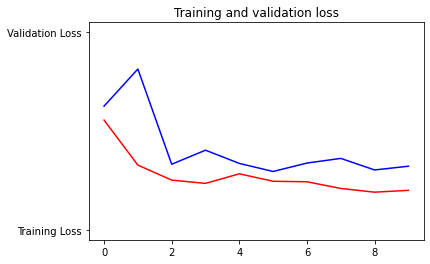

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=model_result.history['accuracy']
val_acc=model_result.history['val_accuracy']
loss=model_result.history['loss']
val_loss=model_result.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # prediksi images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('pneumoniaaaaaaa')
  else:
    print('normal')

Using TensorFlow backend.


MessageError: ignored

In [ ]:
# Export Model and download
import tempfile

MODEL_DIR = "/content/model"
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}
!zip -r /content/model.zip /content/model
from google.colab import files
files.download("/content/model.zip")

export_path = /content/model/1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/model/1/assets

Saved model:
total 136
drwxr-xr-x 2 root root   4096 Jun 22 03:16 assets
-rw-r--r-- 1 root root 130505 Jun 22 03:16 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun 22 03:16 variables
  adding: content/model/ (stored 0%)
  adding: content/model/1/ (stored 0%)
  adding: content/model/1/assets/ (stored 0%)
  adding: content/model/1/saved_model.pb (deflated 89%)
  adding: content/model/1/variables/ (stored 0%)
  adding: content/model/1/variables/variables.data-00000-of-00001 (deflated 24%)
  adding: content/model/1/variables/variables.index (deflated 65%)


KeyboardInterrupt: ignored

In [ ]:
# Google Cloud
from google.colab import auth
auth.authenticate_user()

In [ ]:
CLOUD_PROJECT = 'bangkit-yog4d'
BUCKET = 'gs://' + CLOUD_PROJECT + '-tf2-models'
MODEL = 'chestxray'
!gcloud config set project $CLOUD_PROJECT

Updated property [core/project].


In [ ]:
# RUN 1x saja
!gsutil mb $BUCKET
print(BUCKET)

Creating gs://bangkit-yog4d-tf2-models/...
ServiceException: 409 Bucket bangkit-yog4d-tf2-models already exists.
gs://bangkit-yog4d-tf2-models


In [ ]:
model.save(BUCKET + '/chestxray', save_format='tf')

In [ ]:
# Run 1x saja
!gcloud ai-platform models create $MODEL --regions=us-central1

VERSION = 'v1'
MODEL_DIR = BUCKET + '/chestxray'
!gcloud ai-platform versions create $VERSION \
  --model $MODEL \
  --origin $MODEL_DIR \
  --runtime-version=2.1 \
  --framework='tensorflow' \
  --python-version=3.7

In [ ]:
import googleapiclient.discovery

def predict_json(project, model, instances, version=None):

    service = googleapiclient.discovery.build('ml', 'v1')
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()

    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']

In [ ]:
test_predictions = predict_json(CLOUD_PROJECT, MODEL, test_images[:2].tolist())

NameError: ignored